# Using Predictive Analysis To Predict Diagnosis of a Breast Tumor

# Part_1: Problem Statement
Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a result of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound, and biopsy are commonly used to diagnose breast cancer performed.

# 1.1 Expected outcome
Given breast cancer results from breast fine-needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore, or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

1 = Malignant (Cancerous) - Present
0 = Benign (Not Cancerous) -Absent

# 1.2 Objective
Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning, this is a classification problem.

Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input

# 1.3 Identify data sources
The Breast Cancer datasets is available as machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M = malignant, B = benign), respectively.
The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

# Getting Started: Load libraries and set option

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
dataset= pd.read_csv('C:/Users/User/Desktop/365 Data Science Projects/Breast_cancer.csv')

# Inspecting the data
The first step is to visually inspect the new data set. There are multiple ways to achieve this:

The easiest being to request the first few records using the DataFrame data.head() method. By default, data.head() returns the first 5 rows from the DataFrame object df (excluding the header row).
Alternatively, one can also use df.tail() to return the five rows of the data frame.
For both head and tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.

In [80]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [81]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [82]:
# remove id and unnamed
dataset= dataset.drop('id', axis= 1)
dataset= dataset.drop('Unnamed: 32', axis= 1)

In [83]:
dataset.shape

(569, 31)

# dataset.info()

In [84]:
#diagnosis is object
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

# 2.1 Objectives of Data Exploration
Exploratory data analysis (EDA) is a very important step which takes place after feature engineering and acquiring data and it should be done before any modeling. This is because it is very important for a data scientist to be able to understand the nature of the data without making assumptions. The results of data exploration can be extremely useful in grasping the structure of the data, the distribution of the values, and the presence of extreme values and interrelationships within the data set.

The purpose of EDA is:

to use summary statistics and visualizations to better understand data, *find clues about the tendencies of the data, its quality and to formulate assumptions and the hypothesis of our analysis
For data preprocessing to be successful, it is essential to have an overall picture of your data Basic statistical descriptions can be used to identify properties of the data and highlight which data values should be treated as noise or outliers.**
Next step is to explore the data. There are two approached used to examine the data using:

----> #### Descriptive statistics: is the process of condensing key characteristics of the data set into simple numeric metrics. Some of the common metrics used are mean, standard deviation, and correlation.

-----> Visualization: is the process of projecting the data, or parts of it, into Cartesian space or into abstract images. In the data mining process, data exploration is leveraged in many different steps including preprocessing, modeling, and interpretation of results.

# Part 2: Exploratory Data Analysis

#### Feature Engineering 
https://www.analyticsvidhya.com/blog/2021/03/step-by-step-process-of-feature-engineering-for-machine-learning-algorithms-in-data-science/

#### Why should we use Feature Engineering in data science?
---Feature Selection
---Handling missing values
---Handling imbalanced data
---Handling outliers
---Binning
---Encoding
---Feature Scaling

In [85]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## Skewness

--->https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/
----> https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/


-----> If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.

-----> If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.

-----> If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

In [86]:
dataset.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [87]:
dataset['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [88]:
#Observation:
#357 observations indicating the absence of cancer cells and 212 show absence of cancer cell

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

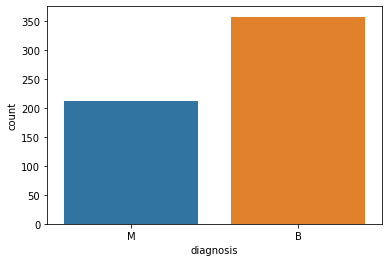

In [89]:
sns.countplot(dataset['diagnosis'])

#### Feature selection 
----->https://www.analyticsvidhya.com/blog/2021/06/feature-selection-techniques-in-machine-learning-2/

1. Feature Importance

The higher the score, the more important the feature is. An inbuilt classifier called Extra Tree Classifier is used here to extract the best 10 features.

In [90]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
x= dataset.drop('diagnosis', axis= 1)
y= dataset['diagnosis']
model.fit(x,y)

ExtraTreesClassifier()

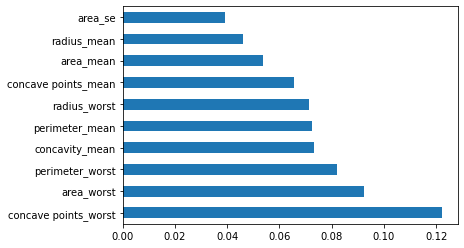

In [91]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [99]:
feature_names= ['concavity_worst', 'area_mean', 'area_worst', 'perimeter_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'radius_mean', 'perimeter_mean', 'concave points_worst']

In [98]:
len(feature_names)

10

In [100]:
dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [102]:
for i in dataset.columns:
    if i not in feature_names:
        print(i)

diagnosis
texture_mean
smoothness_mean
compactness_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
texture_worst
perimeter_worst
smoothness_worst
compactness_worst
symmetry_worst
fractal_dimension_worst


In [107]:
dataset= dataset.drop('texture_mean', axis= 1)

In [108]:
dataset= dataset.drop('smoothness_mean',axis= 1)

In [109]:
dataset= dataset.drop('compactness_mean', axis= 1)

In [110]:
dataset= dataset.drop('symmetry_mean', axis= 1)

In [111]:
dataset= dataset.drop('fractal_dimension_mean',axis= 1)

In [112]:
dataset= dataset.drop('radius_se',axis= 1)

In [113]:
dataset= dataset.drop('texture_se',axis= 1)

In [114]:
dataset= dataset.drop('perimeter_se', axis= 1)

In [115]:
dataset= dataset.drop('area_se',axis= 1)

In [116]:
dataset= dataset.drop('smoothness_se', axis= 1)

In [117]:
dataset= dataset.drop('compactness_se',axis= 1)

In [118]:
dataset= dataset.drop( 'concavity_se', axis= 1)

In [119]:
dataset= dataset.drop('concave points_se', axis= 1)

In [120]:
dataset= dataset.drop('symmetry_se', axis= 1)

In [121]:
dataset= dataset.drop('fractal_dimension_se', axis= 1)

In [122]:
dataset= dataset.drop('texture_worst', axis= 1)

In [123]:
dataset= dataset.drop('perimeter_worst', axis= 1)

In [124]:
dataset= dataset.drop('smoothness_worst', axis= 1)

In [125]:
dataset= dataset.drop('compactness_worst', axis= 1)

In [126]:
dataset= dataset.drop('symmetry_worst', axis= 1)

In [127]:
dataset= dataset.drop('fractal_dimension_worst', axis= 1)

In [128]:
dataset.columns

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

### Univariate selection

In [129]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k= 10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']
print(featureScores.nlargest(10,'Score'))


### Split the data into x and y 

In [165]:
x= dataset.drop('diagnosis', axis= 1)
y= dataset['diagnosis']

In [166]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.25, random_state= 7)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((426, 9), (143, 9), (426,), (143,))

In [167]:
### Feature Scaling

In [168]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_sc= sc.fit_transform(x_train)
x_test_sc= sc.transform(x_test)

In [169]:
x_train_sc

array([[-0.84919185, -0.89422829, -0.77898783, ..., -0.7923168 ,
        -1.35374875, -1.78191453],
       [ 0.41769327,  0.51096163,  0.3095261 , ...,  0.6281689 ,
         2.17861844,  1.30322634],
       [-0.56704713, -0.54122597, -0.59482423, ..., -0.6631352 ,
         0.34376594, -0.55513875],
       ...,
       [-0.71365174, -0.66557906, -0.7229977 , ..., -0.71023444,
        -0.68386671,  0.20204037],
       [-0.1382978 , -0.09355484, -0.22210564, ..., -0.16552152,
         0.47534133,  0.75566692],
       [-1.54874479, -1.54607917, -1.21483254, ..., -1.10016834,
        -1.35374875, -1.78191453]])

In [170]:
x_test_sc

array([[-0.72195011, -0.77268317, -0.68292634, ..., -0.61671856,
        -1.20747916, -1.13546072],
       [ 0.34854016,  0.43073383,  0.20605415, ...,  0.22372979,
         1.38484425,  1.27289064],
       [-0.64726474, -0.65916084, -0.63462113, ..., -0.54760555,
        -0.63200488, -0.68270037],
       ...,
       [-0.39278127, -0.41446605, -0.42630492, ..., -0.44043772,
        -0.47113715, -0.9323632 ],
       [ 0.08575831,  0.05326203, -0.03025711, ..., -0.07149369,
        -0.15708493, -0.38859575],
       [ 1.02900684,  0.99633983,  0.8834249 , ...,  0.75956894,
         0.23139863,  1.21221923]])

In [137]:
### Machine Learning Model Building 

In [138]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [139]:
### SUPPORT VECTOR CLASSIFIER

In [171]:
from sklearn.svm import SVC
svc_cls= SVC()
svc_cls.fit(x_train, y_train)
y_pred_svc= svc_cls.predict(x_test)
acc_sc_svc= accuracy_score(y_test, y_pred_svc)
acc_sc_svc

0.9230769230769231

In [172]:
### using scaled data
svc_cls_2= SVC()
svc_cls_2.fit(x_train_sc, y_train)
y_pred_svc_sc= svc_cls_2.predict(x_test_sc)
acc_sc_svc_sc= accuracy_score(y_test, y_pred_svc_sc)
acc_sc_svc

0.9230769230769231

### LOGISTIC REGRESSION
https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451

In [173]:
from sklearn.linear_model import LogisticRegression
lin_reg= LogisticRegression(random_state= 0, C= 1, penalty= 'l2', solver= 'lbfgs')
lin_reg.fit(x_train,y_train)
y_pred_lin= lin_reg.predict(x_test)
accuracy_score(y_test,y_pred_lin)

0.9370629370629371

In [174]:
from sklearn.linear_model import LogisticRegression
lin_reg_sc= LogisticRegression(random_state= 0, C= 1, penalty= 'l2', solver= 'lbfgs')
lin_reg_sc.fit(x_train_sc,y_train)
y_pred_lin_sc= lin_reg.predict(x_test_sc)
accuracy_score(y_test,y_pred_lin)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9370629370629371

### K- NEAREST NEIGHBOR CLASSIFIER

In [175]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p= 2)
knn.fit(x_train, y_train)
y_pred_knn= knn.predict(x_test)
accuracy_score(y_test, y_pred_knn)

0.9440559440559441

In [176]:
from sklearn.neighbors import KNeighborsClassifier
knn_sc= KNeighborsClassifier(n_neighbors= 5, metric= 'minkowski', p= 2)
knn_sc.fit(x_train_sc, y_train)
y_pred_knn= knn.predict(x_test_sc)
accuracy_score(y_test, y_pred_knn)

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.6853146853146853

### DECISION TREE CLASSIFIER

In [177]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
dtc.fit(x_train, y_train)
y_pred_dtc= dtc.predict(x_test)
accuracy_score(y_test, y_pred_dtc)

0.9230769230769231

In [178]:
from sklearn.tree import DecisionTreeClassifier
dtc_sc= DecisionTreeClassifier(criterion= 'entropy', random_state= 0)
dtc_sc.fit(x_train_sc, y_train)
y_pred_dtc= dtc_sc.predict(x_test_sc)
accuracy_score(y_test, y_pred_dtc)

0.9230769230769231

### RANDOM FOREST CLASSIFIER

In [179]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators= 20, criterion= 'entropy', random_state= 0)
rfc.fit(x_train, y_train)
y_pred_rfc= rfc.predict(x_test)
accuracy_score(y_test, y_pred_rfc)

0.9370629370629371

In [180]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators= 20, criterion= 'entropy', random_state= 0)
rfc.fit(x_train_sc, y_train)
y_pred_rfc_sc= rfc.predict(x_test_sc)
accuracy_score(y_test, y_pred_rfc)

0.9370629370629371

### ADABOOST CLASSIFIER

In [181]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_cls= AdaBoostClassifier(DecisionTreeClassifier(criterion= 'entropy', random_state= 200), n_estimators= 2000, 
                                algorithm= 'SAMME.R', random_state= 1)
adaboost_cls.fit(x_train,y_train)
y_pred_ada= adaboost_cls.predict(x_test)
accuracy_score(y_test, y_pred_ada)

0.9370629370629371

### XGBOOST CLASSIFIER

In [182]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb= xgb.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:15:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.965034965034965

### XGBOOST HYPERPARAMETER TUNING 

In [183]:
params= {
    'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,7,8,9,10,15], 
    'min_child_weight': [1,3,5,7],
    'gamma': [0.1,0.2,0.3,0.4,0.5],
    'colsample_bytree': [0.3,0.4,0.5,0.7]
}

In [184]:
from sklearn.model_selection import RandomizedSearchCV
random_search= RandomizedSearchCV(xgb, param_distributions= params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=1...
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1,
          

In [185]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [186]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [187]:
xgb_pt= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3,
              enable_categorical=False, gamma=0.2,
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1,
              n_estimators=100, n_jobs=4, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=1)

In [188]:
xgb_pt.fit(x_train,y_train)
y_pred_xgb_pt= xgb_pt.predict(x_test)
accuracy_score(y_test,y_pred_xgb)

[12:15:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.965034965034965

In [189]:
cm= confusion_matrix(y_test, y_pred_xgb)
cm

array([[98,  0],
       [ 5, 40]], dtype=int64)

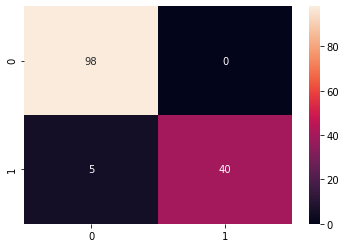

In [190]:
sns.heatmap(cm, annot= True)
plt.show()

In [163]:
### CROSS VALIDATION OF XGB MODEL 

In [164]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator= xgb_pt, X= x_train, y= y_train, cv= 10)
print(cross_validation.mean())

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9461794019933556
